## Sesión 04 - Feature Engineering

In [41]:
# Importamos las librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [42]:
df = pd.read_csv('datos_petroleros_generados.csv')

In [43]:
# Revisión básica
df.head()

,fecha,pozo,campo,petroleo_bbl,gas_mscf,agua_bbl,presion_cabezal_psi,presion_linea_psi,temperatura_c,choke_percent,horas_operativas,liquido_total,corte_agua,gas_petroleo_ratio,produccion_equivalente
0,2022-01-01,POZO-A,CAMPO-A,1259.605698,1491.465814,203.916905,1791.928342,793.077201,82.209703,42.009378,23.534629,1463.522603,0.139333,1.184074,1508.183334
1,2022-01-02,POZO-A,CAMPO-A,1181.730032,1429.280662,180.654841,1807.663519,738.785088,74.599645,52.310863,20.364252,1362.384872,0.132602,1.209482,1419.943476
2,2022-01-03,POZO-A,CAMPO-A,1274.368468,1529.871781,208.609894,1599.779932,789.548837,87.157927,60.121548,23.003376,1482.978362,0.140670,1.200494,1529.347098
3,2022-01-04,POZO-A,CAMPO-A,1377.735865,1658.166842,166.615958,1891.032767,757.473977,79.661918,43.184130,23.327821,1544.351822,0.107887,1.203545,1654.097005
4,2022-01-05,POZO-A,CAMPO-A,1165.202656,1359.592698,221.473781,1833.848848,770.973828,80.300655,50.948531,23.924270,1386.676437,0.159716,1.166829,1391.801439


In [44]:
df.describe()

,petroleo_bbl,gas_mscf,agua_bbl,presion_cabezal_psi,presion_linea_psi,temperatura_c,choke_percent,horas_operativas,liquido_total,corte_agua,gas_petroleo_ratio,produccion_equivalente
count,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000
mean,881.963064,973.320973,324.572474,1764.023397,800.388854,80.046137,49.975162,22.921134,1206.535537,0.280329,1.059526,1044.183226
std,327.456762,473.391522,216.901299,104.288919,49.695904,5.447616,5.042566,0.860390,229.074862,0.184610,0.289902,400.842917
min,163.006778,85.524819,77.391472,1433.975106,615.581735,62.508454,30.816722,19.670496,426.918789,0.053414,0.451341,185.919978
25%,650.718321,522.405512,209.447511,1692.015523,766.948906,76.299515,46.676495,22.355660,1049.784154,0.159975,0.777208,746.326372
50%,842.387910,1114.371215,256.637242,1764.749148,800.734705,79.957900,49.793537,23.003376,1188.151367,0.230937,1.097622,1010.776832
75%,1138.152105,1365.085252,309.894627,1835.512145,834.716319,83.764559,53.411694,23.644311,1350.210139,0.307943,1.226407,1358.205588
max,2037.002906,2485.873766,986.139004,2075.065444,971.445524,97.980409,66.886915,24.000000,2277.988269,0.797238,1.755897,2451.315200


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825 entries, 0 to 1824
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   fecha                   1825 non-null   object 
 1   pozo                    1825 non-null   object 
 2   campo                   1825 non-null   object 
 3   petroleo_bbl            1825 non-null   float64
 4   gas_mscf                1825 non-null   float64
 5   agua_bbl                1825 non-null   float64
 6   presion_cabezal_psi     1825 non-null   float64
 7   presion_linea_psi       1825 non-null   float64
 8   temperatura_c           1825 non-null   float64
 9   choke_percent           1825 non-null   float64
 10  horas_operativas        1825 non-null   float64
 11  liquido_total           1825 non-null   float64
 12  corte_agua              1825 non-null   float64
 13  gas_petroleo_ratio      1825 non-null   float64
 14  produccion_equivalente  1825 non-null   

### Contenido Técnico:

- Técnicas de limpieza de datos
- Tratamiento de valores faltantes en series de producción
- Detección y manejo de outliers operacionales (IQR)
- Normalización y estandarización de variables
- Feature Engineering para datos petroleros : Creación de características derivadas relevantes
- Transformaciones para variables técnicas
- Codificación de variables categóricas (tipos de pozos, formaciones)

Algunas de estas variables en nuestros datos son:

- **Identificadores**: fecha, pozo, campo (fecha y metadatos)

- **Variables numéricas**: petroleo_bbl, gas_mscf, agua_bbl, presion_cabezal_psi, etc.

- **Métricas calculadas**: corte_agua, gas_petroleo_ratio, produccion_equivalente, etc.

#### 1. Limpieza de datos

Revisar duplicados, tipos de datos incorrectos, fechas no válidas.

In [46]:
# Detectar duplicados
df.duplicated().sum()

np.int64(0)

In [47]:
# Revisar tipos de datos y valores faltantes
df.info()
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825 entries, 0 to 1824
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   fecha                   1825 non-null   object 
 1   pozo                    1825 non-null   object 
 2   campo                   1825 non-null   object 
 3   petroleo_bbl            1825 non-null   float64
 4   gas_mscf                1825 non-null   float64
 5   agua_bbl                1825 non-null   float64
 6   presion_cabezal_psi     1825 non-null   float64
 7   presion_linea_psi       1825 non-null   float64
 8   temperatura_c           1825 non-null   float64
 9   choke_percent           1825 non-null   float64
 10  horas_operativas        1825 non-null   float64
 11  liquido_total           1825 non-null   float64
 12  corte_agua              1825 non-null   float64
 13  gas_petroleo_ratio      1825 non-null   float64
 14  produccion_equivalente  1825 non-null   

,fecha,pozo,campo,petroleo_bbl,gas_mscf,agua_bbl,presion_cabezal_psi,presion_linea_psi,temperatura_c,choke_percent,horas_operativas,liquido_total,corte_agua,gas_petroleo_ratio,produccion_equivalente
count,1825,1825,1825,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000,1825.000000
unique,365,5,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2022-12-31,POZO-A,CAMPO-A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,5,365,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,881.963064,973.320973,324.572474,1764.023397,800.388854,80.046137,49.975162,22.921134,1206.535537,0.280329,1.059526,1044.183226
std,NaN,NaN,NaN,327.456762,473.391522,216.901299,104.288919,49.695904,5.447616,5.042566,0.860390,229.074862,0.184610,0.289902,400.842917
min,NaN,NaN,NaN,163.006778,85.524819,77.391472,1433.975106,615.581735,62.508454,30.816722,19.670496,426.918789,0.053414,0.451341,185.919978
25%,NaN,NaN,NaN,650.718321,522.405512,209.447511,1692.015523,766.948906,76.299515,46.676495,22.355660,1049.784154,0.159975,0.777208,746.326372
50%,NaN,NaN,NaN,842.387910,1114.371215,256.637242,1764.749148,800.734705,79.957900,49.793537,23.003376,1188.151367,0.230937,1.097622,1010.776832
75%,NaN,NaN,NaN,1138.152105,1365.085252,309.894627,1835.512145,834.716319,83.764559,53.411694,23.644311,1350.210139,0.307943,1.226407,1358.205588


#### 2. Tratamiento de valores faltantes

In [48]:
# Función me va a ayudar a simular datos nulos:
def simular_nulos_col(serie, porcentaje=0.1, semilla=None):
    serie_mod = serie.copy()
    if semilla is not None:
        np.random.seed(semilla)

    cantidad = int(len(serie) * porcentaje)
    indices = np.random.choice(serie.index, size=cantidad, replace=False)
    serie_mod.loc[indices] = np.nan
    return serie_mod

In [49]:
df.petroleo_bbl.describe()

count    1825.000000
mean      881.963064
std       327.456762
min       163.006778
25%       650.718321
50%       842.387910
75%      1138.152105
max      2037.002906
Name: petroleo_bbl, dtype: float64

In [50]:
simular_nulos_col(df.petroleo_bbl,porcentaje=0.5).describe()

count     913.000000
mean      884.015781
std       328.091562
min       187.307111
25%       645.319371
50%       847.255242
75%      1152.425716
max      1697.588204
Name: petroleo_bbl, dtype: float64

In [51]:
# Simular con nuestro df como si tuvieramos nulos en algunas columnas:
df_missing = df.copy()
df_missing['petroleo_bbl'] = simular_nulos_col(df['petroleo_bbl'], porcentaje=0.2, semilla=1)
df_missing['agua_bbl'] = simular_nulos_col(df['agua_bbl'], porcentaje=0.05, semilla=1)
df_missing['gas_mscf'] = simular_nulos_col(df['gas_mscf'], porcentaje=0.3, semilla=1)


df_missing.sample(25)

,fecha,pozo,campo,petroleo_bbl,gas_mscf,agua_bbl,presion_cabezal_psi,presion_linea_psi,temperatura_c,choke_percent,horas_operativas,liquido_total,corte_agua,gas_petroleo_ratio,produccion_equivalente
102,2022-04-13,POZO-A,CAMPO-A,NaN,NaN,NaN,1834.848995,678.787987,81.518759,50.426591,23.890248,1203.150442,0.169482,1.237904,1205.398018
963,2022-08-22,POZO-C,CAMPO-C,833.632575,1174.462051,238.783403,1705.034136,746.213168,70.269026,49.022826,21.672201,1072.415978,0.222659,1.408849,1029.376250
1651,2022-07-11,POZO-E,CAMPO-E,387.050420,291.033900,711.517044,1788.181909,919.229890,74.753790,46.276219,22.237419,1098.567465,0.647677,0.751928,435.556070
748,2022-01-19,POZO-C,CAMPO-C,908.024316,NaN,243.973738,1620.971515,831.766460,85.426121,44.597963,23.295141,1151.998054,0.211783,1.485560,1132.845019
555,2022-07-10,POZO-B,CAMPO-B,NaN,NaN,265.559808,1699.368472,770.179430,82.330710,48.956658,21.563746,907.721723,0.292556,0.739988,721.360583
1576,2022-04-27,POZO-E,CAMPO-E,NaN,NaN,774.170892,1699.700099,823.975528,86.424644,45.314965,23.612884,1430.635959,0.541138,0.701722,733.241017
1495,2022-02-05,POZO-E,CAMPO-E,421.476391,278.889160,622.890340,1810.044300,899.444232,78.480745,47.844994,21.616982,1044.366730,0.596429,0.661696,467.957917
329,2022-11-26,POZO-A,CAMPO-A,1248.909681,1528.346680,280.827116,1629.719081,867.022522,71.956775,45.742968,20.252495,1529.736798,0.183579,1.223745,1503.634128
1198,2022-04-14,POZO-D,CAMPO-D,1547.158129,1698.708635,103.170215,1672.333359,734.290024,80.385421,46.275106,23.184217,1650.328344,0.062515,1.097954,1830.276234
1627,2022-06-17,POZO-E,CAMPO-E,455.125440,343.002112,651.261696,1648.014767,732.039937,79.718392,52.679285,22.324431,1106.387136,0.588638,0.753643,512.292459


In [52]:
# Método para acompletar valores nulos por medio de interpolación

df_missing.agua_bbl.interpolate(method='linear').describe()

count    1825.000000
mean      324.748157
std       217.314924
min        77.391472
25%       209.447511
50%       256.375448
75%       309.554118
max       986.139004
Name: agua_bbl, dtype: float64

In [53]:
df.agua_bbl.describe()

count    1825.000000
mean      324.572474
std       216.901299
min        77.391472
25%       209.447511
50%       256.637242
75%       309.894627
max       986.139004
Name: agua_bbl, dtype: float64

### 3. Detección y manejo de outliers operacionales

- Identificar outliers en presion_cabezal_psi usando el rango intercuartil (IQR).


In [54]:
# Identificación gráfica de un outlier mediante un gráfico de cajas y bigotes
df['presion_cabezal_psi'].to_frame().boxplot()

<Axes: >

In [55]:
df['presion_cabezal_psi'].describe()

count    1825.000000
mean     1764.023397
std       104.288919
min      1433.975106
25%      1692.015523
50%      1764.749148
75%      1835.512145
max      2075.065444
Name: presion_cabezal_psi, dtype: float64

In [56]:
# Paso 1: Calcular los Cuartiles 1 (25%) y 3 (75%)
Q1 = df['presion_cabezal_psi'].quantile(0.25)
Q3 = df['presion_cabezal_psi'].quantile(0.75)

In [57]:
# Paso 2: Calcular el IQR
IQR = Q3 - Q1
IQR

np.float64(143.49662234649486)

In [58]:
# Paso 3: Definir Límites del IQR
limite_superior = Q3 + 1.5 * IQR
limite_inferior = Q1 - 1.5 * IQR

(limite_inferior, limite_superior)

(np.float64(1476.7705893861432), np.float64(2050.7570787721224))

In [59]:
# Paso 4. Aplicar función lógica para eliminar outliers.
df_presion_limpio = df[ (df['presion_cabezal_psi'] < limite_inferior) | (df['presion_cabezal_psi'] > limite_superior)]

In [60]:
df_presion_limpio

,fecha,pozo,campo,petroleo_bbl,gas_mscf,agua_bbl,presion_cabezal_psi,presion_linea_psi,temperatura_c,choke_percent,horas_operativas,liquido_total,corte_agua,gas_petroleo_ratio,produccion_equivalente
397,2022-02-02,POZO-B,CAMPO-B,826.015911,631.343622,302.602475,2075.065444,747.077968,87.582503,55.169405,20.468231,1128.618386,0.268118,0.764324,931.239848
548,2022-07-03,POZO-B,CAMPO-B,823.048217,644.802142,241.874668,1462.636766,810.965117,73.521372,45.408939,24.000000,1064.922885,0.227129,0.783432,930.515241
557,2022-07-12,POZO-B,CAMPO-B,710.381513,505.135802,313.192284,1476.137334,840.445963,85.661531,54.289494,23.716589,1023.573797,0.305979,0.711077,794.570813
751,2022-01-22,POZO-C,CAMPO-C,1051.068291,1609.775387,233.706552,2062.490522,812.247855,79.891539,47.554219,22.450075,1284.774842,0.181905,1.531561,1319.364188
933,2022-07-23,POZO-C,CAMPO-C,232.712715,366.648515,263.520543,1437.298364,687.904203,86.597226,53.941458,22.615818,496.233258,0.531042,1.575541,293.820801
1016,2022-10-14,POZO-C,CAMPO-C,260.878914,417.860196,224.697365,2054.568113,819.818348,70.117554,45.873540,23.831211,485.576279,0.462744,1.601740,330.522280
1083,2022-12-20,POZO-C,CAMPO-C,810.236853,1203.239870,204.861953,1433.975106,783.326965,67.459118,42.708934,23.881062,1015.098806,0.201815,1.485047,1010.776832
1365,2022-09-28,POZO-D,CAMPO-D,1225.519386,1319.563808,123.401232,1473.754586,745.605349,70.429057,49.618609,22.057225,1348.920619,0.091481,1.076738,1445.446688
1455,2022-12-27,POZO-D,CAMPO-D,1157.387943,1344.837382,136.401355,1453.957358,775.641641,83.708418,45.755477,22.634867,1293.789298,0.105428,1.161959,1381.527507
1596,2022-05-17,POZO-E,CAMPO-E,492.812344,317.082686,703.164905,2057.059373,758.542826,75.630286,45.952166,24.000000,1195.977248,0.587942,0.643415,545.659458


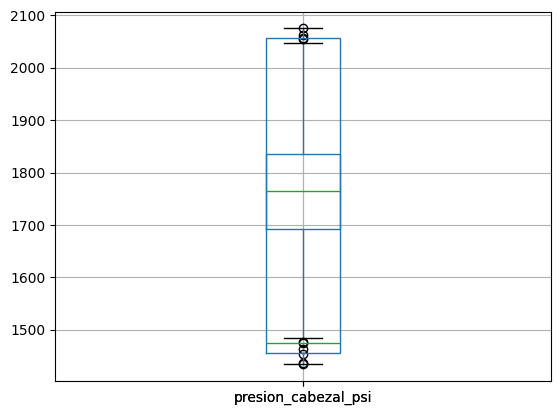

In [61]:
df_presion_limpio['presion_cabezal_psi'].to_frame().boxplot()
plt.show()

#### 5. Feature Engineering para datos petroleros

Transformar datos técnicos en variables que mejor representen el rendimiento, eficiencia y condiciones operativas de pozos petroleros, facilitando así análisis descriptivos, predictivos y de diagnóstico.

🧪 ¿Por qué es importante?

- Ayuda a reducir ruido en modelos de predicción (como forecasting de producción).

- Puede resaltar anomalías o problemas operativos (baja eficiencia, exceso de agua).

- Mejora la explicabilidad de los modelos (por qué una predicción fue hecha).

- Facilita la toma de decisiones operativas y de mantenimiento.




| Variable Derivada       | Fórmula o Idea Clave                     | Interpretación                                   |
| ----------------------- | ---------------------------------------- | ------------------------------------------------ |
| `eficiencia_extraccion` | petroleo\_bbl / horas\_operativas        | Producción de petróleo por hora operativa        |
| `gas_agua_ratio`        | gas\_mscf / agua\_bbl                    | Cantidad de gas producida por unidad de agua     |
| `prod_por_choke`        | petroleo\_bbl / choke\_percent           | Eficiencia relativa a la apertura del choke      |
| `indice_productividad`  | petroleo\_bbl / presion\_cabezal\_psi    | Producción por unidad de presión                 |
| `eficiencia_termica`    | produccion\_equivalente / temperatura\_c | Rendimiento respecto a temperatura               |
| `indice_trabajo`        | horas\_operativas / liquido\_total       | Esfuerzo operativo en relación a producción      |
| `ratio_gas_petroleo`    | gas\_mscf / petroleo\_bbl                | Proporción gas-petróleo (ya existe en tus datos) |


In [62]:
df.sample(10)

,fecha,pozo,campo,petroleo_bbl,gas_mscf,agua_bbl,presion_cabezal_psi,presion_linea_psi,temperatura_c,choke_percent,horas_operativas,liquido_total,corte_agua,gas_petroleo_ratio,produccion_equivalente
718,2022-12-20,POZO-B,CAMPO-B,741.333853,589.355102,285.115787,1662.151440,823.670371,75.550366,46.259520,23.160589,1026.449640,0.277769,0.794993,839.559703
716,2022-12-18,POZO-B,CAMPO-B,614.415202,481.358493,270.157234,1677.236907,797.505992,83.729751,53.298250,22.890977,884.572436,0.305410,0.783442,694.641617
760,2022-01-31,POZO-C,CAMPO-C,867.424236,1303.237409,271.763755,1786.250570,918.464365,74.436731,42.484766,22.094203,1139.187991,0.238559,1.502422,1084.630471
987,2022-09-15,POZO-C,CAMPO-C,784.115844,1127.863390,230.237964,1823.344497,789.320338,75.533054,40.468817,23.780202,1014.353807,0.226980,1.438389,972.093075
728,2022-12-30,POZO-B,CAMPO-B,750.722271,624.064029,276.116321,1756.927994,820.738645,74.528292,47.499011,21.772320,1026.838592,0.268899,0.831285,854.732943
1230,2022-05-16,POZO-D,CAMPO-D,1360.289345,1532.982533,134.206153,1839.216875,700.442993,82.319598,49.785878,21.187272,1494.495498,0.089800,1.126953,1615.786434
989,2022-09-17,POZO-C,CAMPO-C,706.367712,1025.562731,222.296073,1793.215563,743.570466,72.565110,61.053449,22.644065,928.663785,0.239372,1.451882,877.294834
948,2022-08-07,POZO-C,CAMPO-C,1051.014479,1596.909287,240.243660,1549.262282,849.269986,80.654976,47.953297,22.021977,1291.258139,0.186054,1.519398,1317.166027
1289,2022-07-14,POZO-D,CAMPO-D,1066.524933,1148.810805,96.134114,1824.887016,863.621419,71.254643,46.531167,23.094070,1162.659048,0.082685,1.077153,1257.993401
1258,2022-06-13,POZO-D,CAMPO-D,1375.561795,1472.774360,125.480166,1921.884146,793.233288,82.615651,52.446059,23.015123,1501.041961,0.083595,1.070671,1621.024188


In [63]:
# Tasa gas-agua: proporción de gas producido por barril de agua.

df['gas_agua_ratio'] = df['gas_mscf'] / df['agua_bbl']
df

,fecha,pozo,campo,petroleo_bbl,gas_mscf,agua_bbl,presion_cabezal_psi,presion_linea_psi,temperatura_c,choke_percent,horas_operativas,liquido_total,corte_agua,gas_petroleo_ratio,produccion_equivalente,gas_agua_ratio
0,2022-01-01,POZO-A,CAMPO-A,1259.605698,1491.465814,203.916905,1791.928342,793.077201,82.209703,42.009378,23.534629,1463.522603,0.139333,1.184074,1508.183334,7.314086
1,2022-01-02,POZO-A,CAMPO-A,1181.730032,1429.280662,180.654841,1807.663519,738.785088,74.599645,52.310863,20.364252,1362.384872,0.132602,1.209482,1419.943476,7.911665
2,2022-01-03,POZO-A,CAMPO-A,1274.368468,1529.871781,208.609894,1599.779932,789.548837,87.157927,60.121548,23.003376,1482.978362,0.140670,1.200494,1529.347098,7.333649
3,2022-01-04,POZO-A,CAMPO-A,1377.735865,1658.166842,166.615958,1891.032767,757.473977,79.661918,43.184130,23.327821,1544.351822,0.107887,1.203545,1654.097005,9.952029
4,2022-01-05,POZO-A,CAMPO-A,1165.202656,1359.592698,221.473781,1833.848848,770.973828,80.300655,50.948531,23.924270,1386.676437,0.159716,1.166829,1391.801439,6.138843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1820,2022-12-27,POZO-E,CAMPO-E,440.849855,291.937633,818.083224,1642.742741,838.353134,81.196673,43.749872,23.862391,1258.933079,0.649823,0.662216,489.506127,0.356856
1821,2022-12-28,POZO-E,CAMPO-E,531.506085,355.327489,819.811081,1788.790912,826.899184,83.126305,51.528506,21.382379,1351.317166,0.606676,0.668529,590.727333,0.433426
1822,2022-12-29,POZO-E,CAMPO-E,617.516104,394.932310,758.630426,1713.151216,835.892311,83.213985,52.757183,23.449713,1376.146530,0.551272,0.639550,683.338156,0.520586
1823,2022-12-30,POZO-E,CAMPO-E,475.409235,364.584376,791.915867,1730.756765,867.549695,75.258164,53.629106,24.000000,1267.325102,0.624872,0.766885,536.173298,0.460383


In [64]:
# Índice de productividad: Producción por unidad de presión del cabezal.
df['indice_productividad'] = df['petroleo_bbl'] / df['presion_cabezal_psi']


In [65]:
#Eficiencia térmica (proxy): producción por grado Celsius.
df['eficiencia_termica'] = df['produccion_equivalente'] / df['temperatura_c']
df

,fecha,pozo,campo,petroleo_bbl,gas_mscf,agua_bbl,presion_cabezal_psi,presion_linea_psi,temperatura_c,choke_percent,horas_operativas,liquido_total,corte_agua,gas_petroleo_ratio,produccion_equivalente,gas_agua_ratio,indice_productividad,eficiencia_termica
0,2022-01-01,POZO-A,CAMPO-A,1259.605698,1491.465814,203.916905,1791.928342,793.077201,82.209703,42.009378,23.534629,1463.522603,0.139333,1.184074,1508.183334,7.314086,0.702933,18.345564
1,2022-01-02,POZO-A,CAMPO-A,1181.730032,1429.280662,180.654841,1807.663519,738.785088,74.599645,52.310863,20.364252,1362.384872,0.132602,1.209482,1419.943476,7.911665,0.653733,19.034186
2,2022-01-03,POZO-A,CAMPO-A,1274.368468,1529.871781,208.609894,1599.779932,789.548837,87.157927,60.121548,23.003376,1482.978362,0.140670,1.200494,1529.347098,7.333649,0.796590,17.546850
3,2022-01-04,POZO-A,CAMPO-A,1377.735865,1658.166842,166.615958,1891.032767,757.473977,79.661918,43.184130,23.327821,1544.351822,0.107887,1.203545,1654.097005,9.952029,0.728563,20.763961
4,2022-01-05,POZO-A,CAMPO-A,1165.202656,1359.592698,221.473781,1833.848848,770.973828,80.300655,50.948531,23.924270,1386.676437,0.159716,1.166829,1391.801439,6.138843,0.635386,17.332380
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1820,2022-12-27,POZO-E,CAMPO-E,440.849855,291.937633,818.083224,1642.742741,838.353134,81.196673,43.749872,23.862391,1258.933079,0.649823,0.662216,489.506127,0.356856,0.268362,6.028648
1821,2022-12-28,POZO-E,CAMPO-E,531.506085,355.327489,819.811081,1788.790912,826.899184,83.126305,51.528506,21.382379,1351.317166,0.606676,0.668529,590.727333,0.433426,0.297131,7.106383
1822,2022-12-29,POZO-E,CAMPO-E,617.516104,394.932310,758.630426,1713.151216,835.892311,83.213985,52.757183,23.449713,1376.146530,0.551272,0.639550,683.338156,0.520586,0.360456,8.211819
1823,2022-12-30,POZO-E,CAMPO-E,475.409235,364.584376,791.915867,1730.756765,867.549695,75.258164,53.629106,24.000000,1267.325102,0.624872,0.766885,536.173298,0.460383,0.274683,7.124454


In [66]:
# Índice de trabajo del pozo: horas operativas por volumen total de líquido.
df['indice_trabajo'] = df['horas_operativas'] / df['liquido_total']

# Producción por apertura del choke: rendimiento por porcentaje abierto del choke.
df['prod_por_choke'] = df['petroleo_bbl'] / df['choke_percent']


In [60]:
df

,fecha,pozo,campo,petroleo_bbl,gas_mscf,agua_bbl,presion_cabezal_psi,presion_linea_psi,temperatura_c,choke_percent,horas_operativas,liquido_total,corte_agua,gas_petroleo_ratio,produccion_equivalente,gas_agua_ratio,indice_productividad,eficiencia_termica,indice_trabajo,prod_por_choke
0,2022-01-01,POZO-A,CAMPO-A,1259.605698,1491.465814,203.916905,1791.928342,793.077201,82.209703,42.009378,23.534629,1463.522603,0.139333,1.184074,1508.183334,7.314086,0.702933,18.345564,0.016081,29.983917
1,2022-01-02,POZO-A,CAMPO-A,1181.730032,1429.280662,180.654841,1807.663519,738.785088,74.599645,52.310863,20.364252,1362.384872,0.132602,1.209482,1419.943476,7.911665,0.653733,19.034186,0.014948,22.590528
2,2022-01-03,POZO-A,CAMPO-A,1274.368468,1529.871781,208.609894,1599.779932,789.548837,87.157927,60.121548,23.003376,1482.978362,0.140670,1.200494,1529.347098,7.333649,0.796590,17.546850,0.015512,21.196534
3,2022-01-04,POZO-A,CAMPO-A,1377.735865,1658.166842,166.615958,1891.032767,757.473977,79.661918,43.184130,23.327821,1544.351822,0.107887,1.203545,1654.097005,9.952029,0.728563,20.763961,0.015105,31.903754
4,2022-01-05,POZO-A,CAMPO-A,1165.202656,1359.592698,221.473781,1833.848848,770.973828,80.300655,50.948531,23.924270,1386.676437,0.159716,1.166829,1391.801439,6.138843,0.635386,17.332380,0.017253,22.870191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1820,2022-12-27,POZO-E,CAMPO-E,440.849855,291.937633,818.083224,1642.742741,838.353134,81.196673,43.749872,23.862391,1258.933079,0.649823,0.662216,489.506127,0.356856,0.268362,6.028648,0.018954,10.076598
1821,2022-12-28,POZO-E,CAMPO-E,531.506085,355.327489,819.811081,1788.790912,826.899184,83.126305,51.528506,21.382379,1351.317166,0.606676,0.668529,590.727333,0.433426,0.297131,7.106383,0.015823,10.314797
1822,2022-12-29,POZO-E,CAMPO-E,617.516104,394.932310,758.630426,1713.151216,835.892311,83.213985,52.757183,23.449713,1376.146530,0.551272,0.639550,683.338156,0.520586,0.360456,8.211819,0.017040,11.704873
1823,2022-12-30,POZO-E,CAMPO-E,475.409235,364.584376,791.915867,1730.756765,867.549695,75.258164,53.629106,24.000000,1267.325102,0.624872,0.766885,536.173298,0.460383,0.274683,7.124454,0.018938,8.864762


In [67]:
df.to_csv('datos_petroleros_completos.csv',index=None)